In [1]:
import numpy as np
from scipy.special import expit

class Neural_Network:
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        """This is the intialization function for the Neural Network Networks

        Args:
            inputNodes (int): Input nodes for the input layer of the NN layer (All the pixels)
            hiddenNodes (int): Number of hidden neurons in the hidden layer
            outputNodes (int): Output neurons in the output layers (0-9 in this case of)
            learningRate (float): Explanatory
        """
        self.input_nodes = inputNodes
        self.hidden_nodes = hiddenNodes
        self.output_nodes = outputNodes

        print("input: ", self.input_nodes, ", hidden: ", self.hidden_nodes, ", output: ", self.output_nodes)

        # Linking the weight matrices: wih and who
        #self.wih = np.random.rand(self.hidden_nodes, self.input_nodes) - 0.5
        #self.who = np.random.rand(self.output_nodes, self.hidden_nodes) - 0.5

        # Try later
        # wih: weigth input to hidden layers
        # who: weight hidden to output layer
        self.wih = np.random.normal(0.0, pow(self.input_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.who = np.random.normal(0.0, pow(self.hidden_nodes, -0.5), (self.output_nodes, self.hidden_nodes))

        print("Matrix 1: \n", self.wih)
        print("Matrix 2: \n", self.who)

        #learning rate
        self.learning_rate= learningRate

        # Activation function, using the sigmoid function (Values of each neuron)
        self.activation_function = lambda x: expit(x)

    
    def train(self, input_list, target_list):
        """In this function is where we train our Neural Network to deal with the data set, doing both forward and backward
        propagation


        Args:
            input_list (list): list of inputs (numbers to evaluate)
            target_list (list): list of expected results
        """
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T 

        # Calculating and analyzing the Forward propagation
        # Calculate signals into the hidden layers
        hidden_inputs = np.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #output layer error is the target - actual
        output_errors = targets - final_outputs
        # hidden layer errors is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        # Back propagation
        # Update the weights for the links between the hidden and output layers
        self.who += self.learning_rate * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))


    def use(self, input_list):
        """Using the NN after training it

        Args:
            input_list (input): Complete list of all the input(in this case is all the pixels in the image)
        """
        inputs = np.array(input_list, ndmin=2).T 

        # Calculate signals into hidden layers
        hidden_inputs = np.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layers
        hidden_outputs = self.activation_function(hidden_inputs)

        #Calculate signals into final output
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [2]:
example = Neural_Network(3,5,2,0.2)

input:  3 , hidden:  5 , output:  2
Matrix 1: 
 [[-3.61199904e-02 -1.62539338e-01  2.96577821e-01]
 [-9.82528652e-02  1.30441178e+00  8.81713123e-01]
 [-2.45373730e-01  1.02017893e+00 -7.35580078e-01]
 [-1.51735448e-02  4.89414959e-02  4.80179807e-02]
 [-5.53763364e-01  5.19949557e-01  1.87295456e-04]]
Matrix 2: 
 [[-0.40421594  0.04851181  0.92352501 -0.11462969  0.09716683]
 [ 0.01500153  0.30992909  0.20161885  0.39490565  0.22850627]]


In [3]:
example.use([0.1,0.2,0.5])

array([[0.55696181],
       [0.65100881]])

In [36]:
training_data_file = open('mnist_dataset\mnist_train_100.csv', 'r')
training_data = training_data_file.readlines()
training_data_file.close()

In [60]:
labels = []
picture = []
for value_in_training_data in training_data:
    splitted_list = value_in_training_data.split(",")
    data_list = np.asfarray(splitted_list)
    labels.append(data_list[0])
    picture.append(data_list[1:])


In [61]:
import matplotlib.pyplot as plt

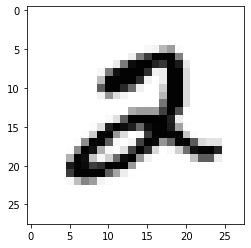

In [62]:
plt.imshow(picture[5].reshape(28,28),cmap="Greys", interpolation="None")

In [70]:
# Training Neural Network
myNN = Neural_Network(784,200,10,0.1)

input:  784 , hidden:  200 , output:  10
Matrix 1: 
 [[ 0.01016148  0.01834906 -0.03911948 ... -0.00676655 -0.05055392
  -0.0232554 ]
 [ 0.00282557  0.03305713 -0.01278439 ... -0.00455    -0.06286049
  -0.05634225]
 [-0.01665048  0.00785209  0.0460012  ...  0.04457637 -0.02130016
  -0.01374266]
 ...
 [-0.10853178  0.02676997  0.01354339 ... -0.02516604  0.03326603
   0.03542538]
 [ 0.0123703  -0.02509152  0.00105993 ...  0.01585362  0.08926689
  -0.05426024]
 [-0.04586081 -0.00089698  0.02888008 ...  0.02987622  0.03954862
   0.01833585]]
Matrix 2: 
 [[-0.05710324 -0.09680012  0.11976862 ...  0.0427372  -0.09407365
   0.11440956]
 [-0.05543714 -0.00861391 -0.04866251 ...  0.04117785  0.11187608
   0.03056882]
 [ 0.18313747 -0.00572553 -0.02389963 ...  0.00976748 -0.05897496
  -0.08662507]
 ...
 [ 0.13180271 -0.03509571  0.02659218 ...  0.12987268  0.06177355
   0.00316882]
 [-0.07739511  0.01247549  0.0206821  ...  0.02791042 -0.01265354
  -0.00786401]
 [ 0.08704506  0.04763532 -0.1177

In [71]:
epochs = 10

for e in range(epochs):
    print("Epoch: ", e + 1)
    for i, _ in enumerate(picture):
        inputs = (picture[i] / 255.0) * 0.99 + 0.01
        targets = np.zeros(10)
        targets[int(labels[i])] = 0.99
        myNN.train(inputs, targets)

Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10


In [73]:
myNN.who

array([[-0.14972346, -0.13900012,  0.21580078, ..., -0.04665846,
        -0.21672831,  0.15342489],
       [-0.16050868, -0.04535967, -0.14001032, ...,  0.01466927,
         0.25390032,  0.00311425],
       [ 0.27855476, -0.00799274, -0.06288365, ..., -0.07178301,
        -0.15825154, -0.26294042],
       ...,
       [ 0.25022284, -0.0620893 ,  0.04746793, ...,  0.24682367,
         0.13636778, -0.00354547],
       [-0.19817923,  0.06126929,  0.01287226, ..., -0.06307434,
        -0.12570265, -0.05623863],
       [ 0.16437118,  0.08103543, -0.30277413, ...,  0.09621012,
        -0.20495439, -0.02118682]])

In [81]:
test_data_file = open('mnist_dataset\mnist_test_10.csv', 'r')
test_data = test_data_file.readlines()
test_data_file.close()


In [101]:
test_labels = []
test_results = []
scoreboard = []
for value_in_test_data in test_data:
    splitted_test_list = value_in_test_data.split(",")
    data_test_list = np.asfarray(splitted_test_list)
    test_labels = (int(data_test_list[0]))
    inputs_nn = (data_test_list[1:] / 255 * 0.99) + 0.01
    # Testing
    outputs_nn = myNN.use(inputs_nn)
    label_nn = np.argmax(outputs_nn)
    if label_nn == test_labels:
        scoreboard.append(1)
    else:
        scoreboard.append(0)


In [102]:
scoreboard

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]